In [1]:
import os
import shutil

# Path to your dataset folder
original_dataset_path = './ISIC-Dataset-Raw/final-image-set'
new_dataset_path = './ISIC-Dataset-Raw/final-image-set-with-new-labels'

# Define the mapping from original labels (folder names) to umbrella labels
# Define the mapping from ISIC 2019 codes to umbrella categories
label_mapping = {
    'MEL': 'Highly dangerous',  # Melanoma
    'NV': 'Benign',  # Melanocytic nevus
    'BCC': 'Moderately dangerous',  # Basal cell carcinoma
    'AK': 'Moderately dangerous',  # Actinic keratosis
    'BKL': 'Benign',  # Benign keratosis (solar lentigo, seborrheic keratosis, lichen planus-like keratosis)
    'DF': 'Benign',  # Dermatofibroma
    'VASC': 'Benign',  # Vascular lesion
    'SCC': 'Highly dangerous'  # Squamous cell carcinoma
}

# Create new folders for the umbrella labels
os.makedirs(new_dataset_path, exist_ok=True)
for umbrella_label in set(label_mapping.values()):
    os.makedirs(os.path.join(new_dataset_path, umbrella_label), exist_ok=True)

# Process the files
for original_label in os.listdir(original_dataset_path):
    original_label_path = os.path.join(original_dataset_path, original_label)
    
    # Skip if not a folder
    if not os.path.isdir(original_label_path):
        continue
    
    # Get the umbrella label for the current original label
    umbrella_label = label_mapping.get(original_label)
    if umbrella_label is None:
        print(f"Warning: No mapping for label '{original_label}', skipping.")
        continue
    
    # Destination path for the umbrella label
    umbrella_label_path = os.path.join(new_dataset_path, umbrella_label)
    
    # Move or copy files to the new folder structure
    for file_name in os.listdir(original_label_path):
        source_file = os.path.join(original_label_path, file_name)
        destination_file = os.path.join(umbrella_label_path, file_name)
        shutil.copy(source_file, destination_file)  # Use `shutil.move` to move instead of copy

print("Dataset reorganization complete!")

Dataset reorganization complete!


In [2]:
import os
import shutil
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the dataset directory
dataset_dir = 'ISIC-Dataset-Raw/final-image-set-with-new-labels'
output_dir = 'ISIC-Dataset-Raw/split_dataset-with-new-labels'  # Folder where we will store train, validation, and test splits

# Create directories for training, validation, and test splits
train_dir = os.path.join(output_dir, 'train')
validation_dir = os.path.join(output_dir, 'validation')
test_dir = os.path.join(output_dir, 'test')

# Ensure directories exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Initialize lists to hold image paths and labels
image_paths = []
labels = []

# Loop through each subdirectory (class folder)
for label in os.listdir(dataset_dir):
    label_dir = os.path.join(dataset_dir, label)
    
    if os.path.isdir(label_dir):  # Process only directories
        for image_file in os.listdir(label_dir):
            # Append full image path and the corresponding label
            image_paths.append(os.path.join(label_dir, image_file))
            labels.append(label)

# Create a DataFrame with image paths and labels
df = pd.DataFrame({
    'image_path': image_paths,
    'label': labels
})

# First, split data into train and temp (80% train, 20% temp for validation + test)
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

# Then, split temp into validation and test (50% each from 20% of the data, i.e., 10% each of total data)
validation_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['label'])

# Function to copy images to specified directories
def copy_images(dataframe, destination_dir):
    for _, row in dataframe.iterrows():
        label_dir = os.path.join(destination_dir, row['label'])
        os.makedirs(label_dir, exist_ok=True)  # Create label subdirectory if it doesn't exist
        shutil.copy(row['image_path'], label_dir)  # Copy image to the respective folder

# Copy images to train, validation, and test folders
print("Copying training images...")
copy_images(train_df, train_dir)
print("Copying validation images...")import os
import shutil
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the dataset directory
dataset_dir = 'ISIC-Dataset-Raw/final-image-set-with-new-labels'
output_dir = 'ISIC-Dataset-Raw/split_dataset-with-new-labels'  # Folder where we will store train, validation, and test splits

# Create directories for training, validation, and test splits
train_dir = os.path.join(output_dir, 'train')
validation_dir = os.path.join(output_dir, 'validation')
test_dir = os.path.join(output_dir, 'test')

# Ensure directories exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Initialize lists to hold image paths and labels
image_paths = []
labels = []

# Loop through each subdirectory (class folder)
for label in os.listdir(dataset_dir):
    label_dir = os.path.join(dataset_dir, label)
    
    if os.path.isdir(label_dir):  # Process only directories
        for image_file in os.listdir(label_dir):
            # Append full image path and the corresponding label
            image_paths.append(os.path.join(label_dir, image_file))
            labels.append(label)

# Create a DataFrame with image paths and labels
df = pd.DataFrame({
    'image_path': image_paths,
    'label': labels
})

# First, split data into train and temp (80% train, 20% temp for validation + test)
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

# Then, split temp into validation and test (50% each from 20% of the data, i.e., 10% each of total data)
validation_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['label'])

# Function to copy images to specified directories
def copy_images(dataframe, destination_dir):
    for _, row in dataframe.iterrows():
        label_dir = os.path.join(destination_dir, row['label'])
        os.makedirs(label_dir, exist_ok=True)  # Create label subdirectory if it doesn't exist
        shutil.copy(row['image_path'], label_dir)  # Copy image to the respective folder

# Copy images to train, validation, and test folders
print("Copying training images...")
copy_images(train_df, train_dir)
print("Copying validation images...")
copy_images(validation_df, validation_dir)
print("Copying test images...")
copy_images(test_df, test_dir)

print(f"Dataset splits are prepared in {output_dir}")
copy_images(validation_df, validation_dir)
print("Copying test images...")
copy_images(test_df, test_dir)

print(f"Dataset splits are prepared in {output_dir}")

Copying training images...
Copying validation images...
Copying test images...
Dataset splits are prepared in ISIC-Dataset-Raw/split_dataset-with-new-labels


2024-12-13 20:19:39,389 - Training data directory: ./ISIC-Dataset-Raw/split_dataset-with-new-labels/train
2024-12-13 20:19:39,390 - Validation data directory: ./ISIC-Dataset-Raw/split_dataset-with-new-labels/validation
2024-12-13 20:19:39,391 - Test data directory: ./ISIC-Dataset-Raw/split_dataset-with-new-labels/test
2024-12-13 20:19:39,391 - Initializing ImageDataGenerator with rescaling...
2024-12-13 20:19:39,395 - Loading training data...


Found 20264 images belonging to 3 classes.


2024-12-13 20:19:40,033 - Training data loaded. Found 20264 images belonging to 3 classes.
2024-12-13 20:19:40,033 - Loading validation data...


Found 2533 images belonging to 3 classes.


2024-12-13 20:19:40,111 - Validation data loaded. Found 2533 images belonging to 3 classes.
2024-12-13 20:19:40,111 - Loading test data...


Found 2534 images belonging to 3 classes.


2024-12-13 20:19:40,192 - Test data loaded. Found 2534 images belonging to 3 classes.
2024-12-13 20:19:40,192 - Input shape: (128, 128, 3)
2024-12-13 20:19:40,193 - Number of classes: 3
2024-12-13 20:19:40,194 - No saved model found. Building and training a new model...
2024-12-13 20:19:40,194 - Building the CNN model...
2024-12-13 20:19:40,336 - Model successfully compiled with Adam optimizer and categorical crossentropy loss.
2024-12-13 20:19:40,943 - Epoch 1/10 - Starting...


Epoch 1/10
634/634 [==============================] - ETA: 0s - loss: 0.8132 - accuracy: 0.6383

2024-12-13 20:31:11,417 - Epoch 1/10 completed. Loss: 0.8132, Accuracy: 0.6383, Validation Loss: 0.7580, Validation Accuracy: 0.6660


634/634 [==============================] - 690s 1s/step - loss: 0.8132 - accuracy: 0.6383 - val_loss: 0.7580 - val_accuracy: 0.6660


2024-12-13 20:31:11,431 - Epoch 2/10 - Starting...


Epoch 2/10
634/634 [==============================] - ETA: 0s - loss: 0.7406 - accuracy: 0.6698

2024-12-13 20:39:09,026 - Epoch 2/10 completed. Loss: 0.7406, Accuracy: 0.6698, Validation Loss: 0.7087, Validation Accuracy: 0.6818


634/634 [==============================] - 478s 753ms/step - loss: 0.7406 - accuracy: 0.6698 - val_loss: 0.7087 - val_accuracy: 0.6818


2024-12-13 20:39:09,036 - Epoch 3/10 - Starting...


Epoch 3/10
634/634 [==============================] - ETA: 0s - loss: 0.7038 - accuracy: 0.6863

2024-12-13 20:49:38,687 - Epoch 3/10 completed. Loss: 0.7038, Accuracy: 0.6863, Validation Loss: 0.6838, Validation Accuracy: 0.6901


634/634 [==============================] - 630s 994ms/step - loss: 0.7038 - accuracy: 0.6863 - val_loss: 0.6838 - val_accuracy: 0.6901


2024-12-13 20:49:38,701 - Epoch 4/10 - Starting...


Epoch 4/10
634/634 [==============================] - ETA: 0s - loss: 0.6787 - accuracy: 0.7026

2024-12-13 21:03:47,518 - Epoch 4/10 completed. Loss: 0.6787, Accuracy: 0.7026, Validation Loss: 0.6701, Validation Accuracy: 0.7059


634/634 [==============================] - 849s 1s/step - loss: 0.6787 - accuracy: 0.7026 - val_loss: 0.6701 - val_accuracy: 0.7059


2024-12-13 21:03:47,528 - Epoch 5/10 - Starting...


Epoch 5/10
634/634 [==============================] - ETA: 0s - loss: 0.6551 - accuracy: 0.7128

2024-12-13 21:12:53,014 - Epoch 5/10 completed. Loss: 0.6551, Accuracy: 0.7128, Validation Loss: 0.6448, Validation Accuracy: 0.7296


634/634 [==============================] - 545s 861ms/step - loss: 0.6551 - accuracy: 0.7128 - val_loss: 0.6448 - val_accuracy: 0.7296


2024-12-13 21:12:53,030 - Epoch 6/10 - Starting...


Epoch 6/10
634/634 [==============================] - ETA: 0s - loss: 0.6391 - accuracy: 0.7195

2024-12-13 21:24:27,339 - Epoch 6/10 completed. Loss: 0.6391, Accuracy: 0.7195, Validation Loss: 0.6301, Validation Accuracy: 0.7264


634/634 [==============================] - 694s 1s/step - loss: 0.6391 - accuracy: 0.7195 - val_loss: 0.6301 - val_accuracy: 0.7264


2024-12-13 21:24:27,350 - Epoch 7/10 - Starting...


Epoch 7/10
634/634 [==============================] - ETA: 0s - loss: 0.6205 - accuracy: 0.7330

2024-12-13 21:33:19,918 - Epoch 7/10 completed. Loss: 0.6205, Accuracy: 0.7330, Validation Loss: 0.6591, Validation Accuracy: 0.7110


634/634 [==============================] - 533s 840ms/step - loss: 0.6205 - accuracy: 0.7330 - val_loss: 0.6591 - val_accuracy: 0.7110


2024-12-13 21:33:19,932 - Epoch 8/10 - Starting...


Epoch 8/10
634/634 [==============================] - ETA: 0s - loss: 0.5982 - accuracy: 0.7400

2024-12-13 21:45:41,811 - Epoch 8/10 completed. Loss: 0.5982, Accuracy: 0.7400, Validation Loss: 0.6213, Validation Accuracy: 0.7327


634/634 [==============================] - 742s 1s/step - loss: 0.5982 - accuracy: 0.7400 - val_loss: 0.6213 - val_accuracy: 0.7327


2024-12-13 21:45:41,848 - Epoch 9/10 - Starting...


Epoch 9/10
634/634 [==============================] - ETA: 0s - loss: 0.5764 - accuracy: 0.7507

2024-12-13 22:02:23,491 - Epoch 9/10 completed. Loss: 0.5764, Accuracy: 0.7507, Validation Loss: 0.6270, Validation Accuracy: 0.7292


634/634 [==============================] - 1002s 2s/step - loss: 0.5764 - accuracy: 0.7507 - val_loss: 0.6270 - val_accuracy: 0.7292


2024-12-13 22:02:23,628 - Epoch 10/10 - Starting...


Epoch 10/10
634/634 [==============================] - ETA: 0s - loss: 0.5600 - accuracy: 0.7607

2024-12-13 22:20:24,337 - Epoch 10/10 completed. Loss: 0.5600, Accuracy: 0.7607, Validation Loss: 0.6309, Validation Accuracy: 0.7339


634/634 [==============================] - 1081s 2s/step - loss: 0.5600 - accuracy: 0.7607 - val_loss: 0.6309 - val_accuracy: 0.7339


2024-12-13 22:20:24,378 - Model training complete.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
2024-12-13 22:20:24,662 - Model saved to ./trained_model123.h5
2024-12-13 22:20:24,681 - Evaluating the model on the test set...


80/80 [==============================] - 65s 805ms/step - loss: 0.6416 - accuracy: 0.7202


2024-12-13 22:21:30,279 - Test Loss: 0.6416, Test Accuracy: 0.7202
2024-12-13 22:21:30,280 - Generating predictions for the test set...


80/80 [==============================] - 45s 564ms/step


2024-12-13 22:22:15,812 - Generating classification report...
2024-12-13 22:22:15,856 - Generating confusion matrix...



Classification Report:

                      precision    recall  f1-score   support

              Benign       0.78      0.86      0.82      1600
    Highly dangerous       0.61      0.34      0.44       515
Moderately dangerous       0.57      0.65      0.61       419

            accuracy                           0.72      2534
           macro avg       0.65      0.62      0.62      2534
        weighted avg       0.71      0.72      0.71      2534



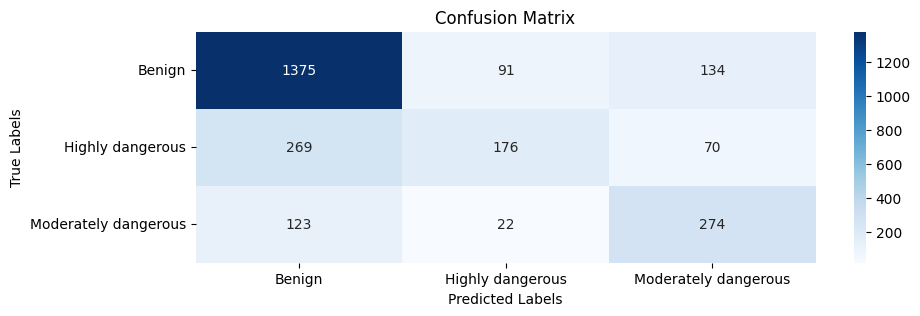

In [7]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(message)s')
logger = logging.getLogger()

# Define the CNN model
def build_baseline_model(input_shape, num_classes):
    logger.info("Building the CNN model...")
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    logger.info("Model successfully compiled with Adam optimizer and categorical crossentropy loss.")
    return model

# Define directories for training, validation, and test data
train_data_dir = './ISIC-Dataset-Raw/split_dataset-with-new-labels/train'
validation_data_dir = './ISIC-Dataset-Raw/split_dataset-with-new-labels/validation'
test_data_dir = './ISIC-Dataset-Raw/split_dataset-with-new-labels/test'

# Log dataset directories
logger.info(f"Training data directory: {train_data_dir}")
logger.info(f"Validation data directory: {validation_data_dir}")
logger.info(f"Test data directory: {test_data_dir}")

# Initialize ImageDataGenerator
logger.info("Initializing ImageDataGenerator with rescaling...")
datagen = ImageDataGenerator(rescale=1./255)

# Load data from directories
logger.info("Loading training data...")
train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)
logger.info(f"Training data loaded. Found {train_generator.samples} images belonging to {len(train_generator.class_indices)} classes.")

logger.info("Loading validation data...")
validation_generator = datagen.flow_from_directory(
    validation_data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)
logger.info(f"Validation data loaded. Found {validation_generator.samples} images belonging to {len(validation_generator.class_indices)} classes.")

logger.info("Loading test data...")
test_generator = datagen.flow_from_directory(
    test_data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Ensures consistent ordering for predictions
)
logger.info(f"Test data loaded. Found {test_generator.samples} images belonging to {len(test_generator.class_indices)} classes.")

# Get input shape and number of classes
input_shape = (128, 128, 3)
num_classes = len(train_generator.class_indices)
logger.info(f"Input shape: {input_shape}")
logger.info(f"Number of classes: {num_classes}")

# Check if a saved model exists
model_path = './trained_model123.h5'
if os.path.exists(model_path):
    logger.info(f"Found existing model at {model_path}. Loading it...")
    model = load_model(model_path)
else:
    # Build and train the baseline model
    logger.info("No saved model found. Building and training a new model...")
    model = build_baseline_model(input_shape, num_classes)

    # Add detailed epoch logging with a custom callback
    class TrainingLogger(tf.keras.callbacks.Callback):
        def on_epoch_begin(self, epoch, logs=None):
            logger.info(f"Epoch {epoch + 1}/{self.params['epochs']} - Starting...")

        def on_epoch_end(self, epoch, logs=None):
            logger.info(
                f"Epoch {epoch + 1}/{self.params['epochs']} completed. "
                f"Loss: {logs['loss']:.4f}, Accuracy: {logs['accuracy']:.4f}, "
                f"Validation Loss: {logs['val_loss']:.4f}, Validation Accuracy: {logs['val_accuracy']:.4f}"
            )

    training_logger = TrainingLogger()

    history = model.fit(
        train_generator,
        validation_data=validation_generator,
        epochs=10,
        callbacks=[training_logger]
    )
    logger.info("Model training complete.")

    # Save the trained model
    model.save(model_path)
    logger.info(f"Model saved to {model_path}")

# Evaluate the model on the test set
logger.info("Evaluating the model on the test set...")
test_loss, test_accuracy = model.evaluate(test_generator)
logger.info(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Generate predictions
logger.info("Generating predictions for the test set...")
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Classification Report
logger.info("Generating classification report...")
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("\nClassification Report:\n")
print(report)

# Confusion Matrix
logger.info("Generating confusion matrix...")
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

2024-12-14 19:19:24,228 - Initializing ImageDataGenerator with rescaling...
2024-12-14 19:19:24,248 - Loading data...


Found 20264 images belonging to 3 classes.
Found 2533 images belonging to 3 classes.
Found 2534 images belonging to 3 classes.


2024-12-14 19:19:24,805 - Found existing model at ./trained_model123.h5. Loading it...
2024-12-14 19:19:25,210 - Evaluating model on clean test set...


80/80 [==============================] - 24s 303ms/step - loss: 0.6416 - accuracy: 0.7202


2024-12-14 19:19:49,895 - Test Loss: 0.6416, Test Accuracy: 0.7202
2024-12-14 19:19:49,896 - Generating confusion matrix for clean test images...


80/80 [==============================] - 5s 57ms/step


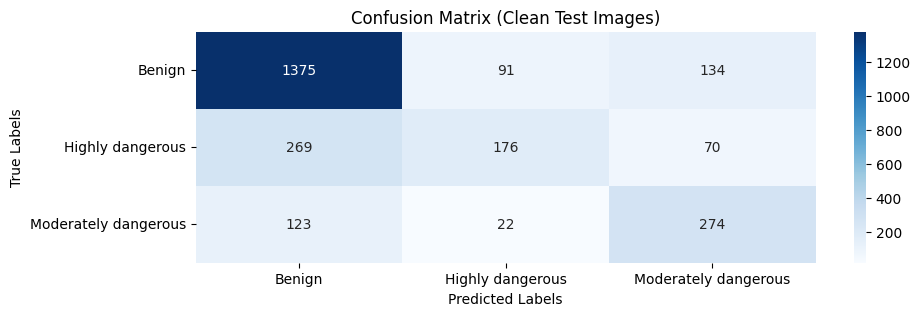

2024-12-14 19:20:16,885 - Generating adversarial examples using FGSM...


80/80 [==============================] - 4s 49ms/step


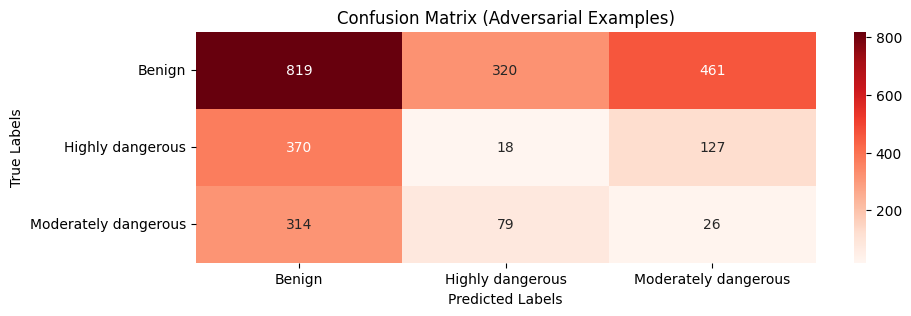

2024-12-14 19:22:09,887 - Applying randomized smoothing to images...


80/80 [==============================] - 5s 58ms/step


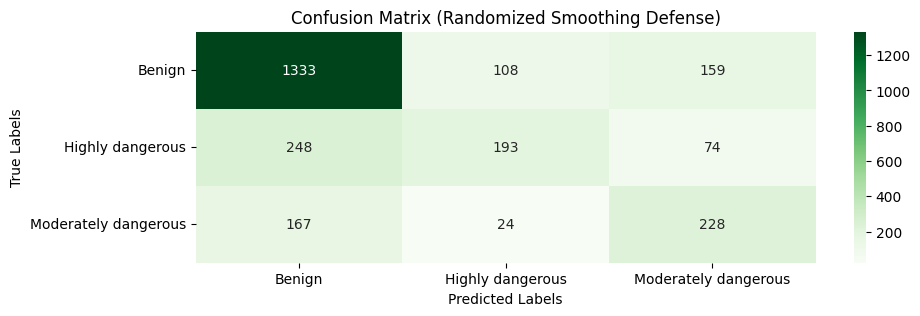

In [9]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(message)s')
logger = logging.getLogger()

# Define the CNN model
def build_baseline_model(input_shape, num_classes):
    logger.info("Building the CNN model...")
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    logger.info("Model successfully compiled with Adam optimizer and categorical crossentropy loss.")
    return model

# Define directories for training, validation, and test data
train_data_dir = './ISIC-Dataset-Raw/split_dataset-with-new-labels/train'
validation_data_dir = './ISIC-Dataset-Raw/split_dataset-with-new-labels/validation'
test_data_dir = './ISIC-Dataset-Raw/split_dataset-with-new-labels/test'

# Initialize ImageDataGenerator
logger.info("Initializing ImageDataGenerator with rescaling...")
datagen = ImageDataGenerator(rescale=1./255)

# Load data from directories
logger.info("Loading data...")
train_generator = datagen.flow_from_directory(
    train_data_dir, target_size=(128, 128), batch_size=32, class_mode='categorical'
)
validation_generator = datagen.flow_from_directory(
    validation_data_dir, target_size=(128, 128), batch_size=32, class_mode='categorical'
)
test_generator = datagen.flow_from_directory(
    test_data_dir, target_size=(128, 128), batch_size=32, class_mode='categorical', shuffle=False
)

# Get input shape and number of classes
input_shape = (128, 128, 3)
num_classes = len(train_generator.class_indices)

# Check if a saved model exists
model_path = './trained_model123.h5'
if os.path.exists(model_path):
    logger.info(f"Found existing model at {model_path}. Loading it...")
    model = load_model(model_path)
else:
    model = build_baseline_model(input_shape, num_classes)
    history = model.fit(
        train_generator,
        validation_data=validation_generator,
        epochs=3
    )
    model.save(model_path)

# Evaluate the model on clean test data
logger.info("Evaluating model on clean test set...")
test_loss, test_accuracy = model.evaluate(test_generator)
logger.info(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Confusion matrix for clean test data
logger.info("Generating confusion matrix for clean test images...")
test_images, test_labels = [], []

for _ in range(len(test_generator)):
    images, labels = next(test_generator)
    test_images.append(images)
    test_labels.append(labels)

test_images = np.concatenate(test_images, axis=0)
test_labels = np.concatenate(test_labels, axis=0)

predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)
class_labels = list(test_generator.class_indices.keys())

clean_conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 3))
sns.heatmap(clean_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix (Clean Test Images)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# FGSM Attack
def generate_fgsm_examples(model, images, labels, epsilon=0.01):
    logger.info("Generating adversarial examples using FGSM...")
    images = tf.convert_to_tensor(images)
    labels = tf.convert_to_tensor(labels)

    with tf.GradientTape() as tape:
        tape.watch(images)
        predictions = model(images)
        loss = tf.keras.losses.categorical_crossentropy(labels, predictions)

    gradients = tape.gradient(loss, images)
    perturbations = epsilon * tf.sign(gradients)
    adversarial_images = tf.clip_by_value(images + perturbations, 0, 1)
    return adversarial_images

adversarial_images = generate_fgsm_examples(model, test_images, test_labels)
adv_predictions = model.predict(adversarial_images)
adv_predicted_classes = np.argmax(adv_predictions, axis=1)

adv_conf_matrix = confusion_matrix(true_classes, adv_predicted_classes)
plt.figure(figsize=(10, 3))
sns.heatmap(adv_conf_matrix, annot=True, fmt="d", cmap="Reds", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix (Adversarial Examples)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Randomized Smoothing Defense
def apply_randomized_smoothing(images, noise_std=0.1):
    logger.info("Applying randomized smoothing to images...")
    noise = tf.random.normal(shape=images.shape, mean=0.0, stddev=noise_std, dtype=tf.float32)
    smoothed_images = tf.clip_by_value(images + noise, 0, 1)
    return smoothed_images

smoothed_images = apply_randomized_smoothing(test_images)
smooth_predictions = model.predict(smoothed_images)
smooth_predicted_classes = np.argmax(smooth_predictions, axis=1)

smooth_conf_matrix = confusion_matrix(true_classes, smooth_predicted_classes)
plt.figure(figsize=(10, 3))
sns.heatmap(smooth_conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix (Randomized Smoothing Defense)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()